In [1]:
# auto-reload all helper files
%load_ext autoreload
%autoreload 2

In [19]:
# Imports
import config
import numpy as np
from data import get_cifar10_data
from model import build_model
from train import compile_model, train_model, evaluate_model
from metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# load data
x_train, y_train, x_test, y_test = get_cifar10_data()

In [ ]:
# Build and compile - # Run ONCE per model lifecycle as it resets model weights

model = build_model()
model = compile_model(model)

In [ ]:
# Train model

history = train_model(
    model,
    x_train,
    y_train,
    batch_size=config.BATCH_SIZE,
    epochs=config.EPOCHS,
)

print(">>> TRAINING STARTING <<<")

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2798 - loss: 2.0042 - val_accuracy: 0.2250 - val_loss: 2.1039
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3807 - loss: 1.7619 - val_accuracy: 0.3406 - val_loss: 1.8092
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4318 - loss: 1.6081 - val_accuracy: 0.4134 - val_loss: 1.6340
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4676 - loss: 1.4994 - val_accuracy: 0.3868 - val_loss: 1.6979
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4975 - loss: 1.4206 - val_accuracy: 0.4720 - val_loss: 1.4608
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5200 - loss: 1.3598 - val_accuracy: 0.4116 - val_loss: 1.7212
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5396 - loss: 1.3079 - val_accuracy: 0.4936 - val_loss: 1.3964
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5538 - loss: 1.2645 - val_accuracy: 0.

In [ ]:
# Evaluate Testing Data

test_loss, test_accuracy = evaluate_model(model, x_test, y_test)
print(f"Test accuracy: {test_accuracy:.2%}")
print(f"Test Loss: {test_loss:.4f}")

Test accuracy: 58.78%
Test Loss: 1.5686


In [ ]:
# Metrics

y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred, config.NUM_CLASSES)

# Class names for reference [extracted from documentation]
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step


array([[624,  14,  18,   2, 118,   7,   7,  17, 112,  81],
       [ 22, 646,   5,   3,  27,   3,   3,   5,  52, 234],
       [ 71,   5, 249,  15, 451,  66,  20,  56,  33,  34],
       [ 17,  13,  31, 154, 391, 188,  46,  53,  28,  79],
       [  7,   0,  10,   5, 906,  15,  10,  27,  13,   7],
       [ 10,   3,  29,  39, 281, 496,  15,  75,  20,  32],
       [  7,   9,  12,  20, 332,  31, 524,  12,  16,  37],
       [  8,   3,   4,   6, 238,  35,   1, 668,   2,  35],
       [ 48,  29,   3,   2,  47,   7,   0,   4, 785,  75],
       [ 17,  46,   2,   3,  39,   4,   1,  28,  34, 826]])

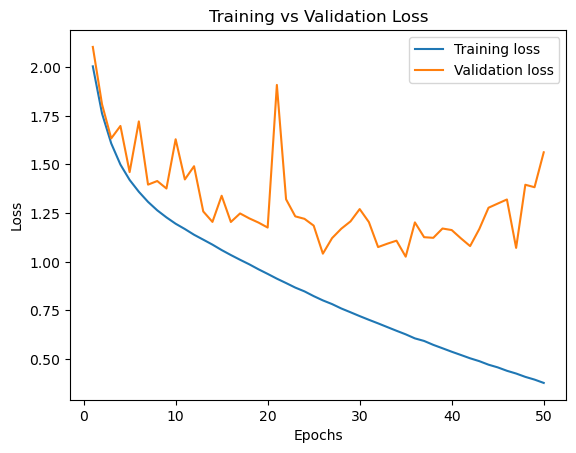

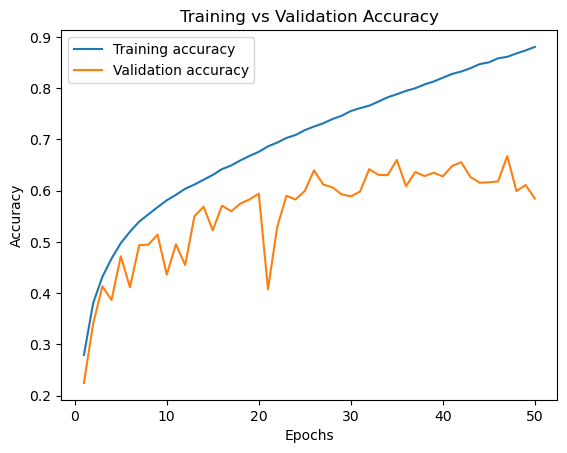

Training Loss: 0.377853
Validation Loss: 1.562572
Training Accuracy: 88.03%
Validation Accuracy: 58.44%


Best Epoch: 35
Best Training Loss: 0.6274
Best Validation Loss: 1.0263
Best Training Accuracy: 78.80%
Best Validation Accuracy: 65.98%


In [ ]:
# Plot Training Data
val_loss = history.history['val_loss']
loss = history.history['loss']

# Cleaner and more explicit than hardcoding a range - becomes useful when EarlyStopping comes into play (we pass 'loss' but it could be any history.history.keys() as they all have same length)
epoch_axis = range(1, len(history.history["loss"]) + 1)

plt.figure()
plt.plot(epoch_axis, loss, label="Training loss")
plt.plot(epoch_axis, val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

# storing accuracy metrics
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure()
plt.plot(epoch_axis, accuracy, label="Training accuracy")
plt.plot(epoch_axis, val_accuracy, label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


# print last epoch training data results to snapshot the current model performance [tracked in Excel file]
print(f'Training Loss: {loss[-1]:4f}')
print(f'Validation Loss: {val_loss[-1]:4f}')
print(f'Training Accuracy: {accuracy[-1]:.2%}')
print(f'Validation Accuracy: {val_accuracy[-1]:.2%}')
print('\n')

# Print out the best epoch where val_loss was at a minimum
best_epoch = np.argmin(val_loss)

# Results below are diagnostics only (not used for Excel reporting)
print(f"Best Epoch: {best_epoch + 1}")
print(f"Best Training Loss: {loss[best_epoch]:.4f}")
print(f"Best Validation Loss: {val_loss[best_epoch]:.4f}")
print(f"Best Training Accuracy: {accuracy[best_epoch]:.2%}")
print(f"Best Validation Accuracy: {val_accuracy[best_epoch]:.2%}")
